In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_EffNet5_b5_1FC_cross_15AB_15AB.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
dataframe = pd.read_csv('/home/yupaporn/codes/result_model/FVtest_RF_15AB_1FC_3.csv')

In [5]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.107834,0.312153,0.017337,-0.183516,0.575317,-0.173991,-0.089335,-0.063324,-0.030139,...,0.138473,-0.108649,0.148072,0.400463,0.140204,0.374979,Abnormal,P1,FP-A,AB01
1,1,0.410596,0.660919,-0.136564,-0.185140,0.411923,-0.167171,0.004935,0.000345,-0.130163,...,0.396031,-0.173826,-0.012627,0.236496,0.633178,0.092445,Abnormal,P2,FP-A,AB01
2,2,-0.017506,0.345108,0.225856,-0.165460,0.779618,-0.193235,-0.032824,-0.147712,-0.096544,...,0.282353,-0.138690,-0.005355,0.241840,0.390013,-0.130200,Abnormal,P41,FP-B,AB01
3,3,-0.020903,0.117675,-0.082832,-0.135977,0.282651,-0.220009,0.111933,-0.094878,-0.103359,...,0.298243,-0.055977,0.022169,0.057336,0.233832,-0.014271,Abnormal,P51,FP-C,AB01
4,4,0.064263,0.339077,0.294470,-0.157962,0.194468,-0.202357,-0.088951,-0.190239,-0.139355,...,0.215621,0.174917,-0.076772,0.139161,0.083017,-0.109640,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,0.744560,1.183851,-0.053521,-0.201383,0.486395,-0.161736,0.369923,0.262435,0.401869,...,-0.007029,-0.143082,0.694543,0.309269,0.582698,0.681160,Normal,P32,FP-B,Normal
1308,1308,0.002655,-0.022163,-0.106891,-0.050454,0.119425,0.226082,-0.119361,0.402494,0.157569,...,-0.033625,0.049808,0.067248,0.423208,-0.147667,0.224346,Normal,P42,FP-B,Normal
1309,1309,0.311473,0.809877,-0.182767,-0.104543,0.685962,0.047534,0.061280,0.351369,0.239477,...,0.758374,0.121146,0.329733,1.196532,0.142886,0.753334,Normal,P52,FP-C,Normal
1310,1310,0.273309,-0.022789,0.022111,-0.126591,-0.079215,-0.175265,0.018625,-0.036004,0.046267,...,0.102547,-0.169974,0.069229,0.219710,-0.151904,0.272406,Normal,P61,FP-C,Normal


In [7]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [8]:

labels = {0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}

In [10]:
pred_list = list()
prob_list = list()
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
for i in range(0,len(y_prob)):
    result = y_prob[i]
    re_class = list()
    re_prop = list()  
    maxx = np.argmax(result)
    re_class=labels[maxx]
    re_prop = result[14]
    pred_list.append(re_class)
    prob_list.append(re_prop)

In [11]:
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

In [12]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,category,Prob
0,0,-0.107834,0.312153,0.017337,-0.183516,0.575317,-0.173991,-0.089335,-0.063324,-0.030139,...,0.148072,0.400463,0.140204,0.374979,Abnormal,P1,FP-A,AB01,Normal,0.413035
1,1,0.410596,0.660919,-0.136564,-0.185140,0.411923,-0.167171,0.004935,0.000345,-0.130163,...,-0.012627,0.236496,0.633178,0.092445,Abnormal,P2,FP-A,AB01,AB01,0.110668
2,2,-0.017506,0.345108,0.225856,-0.165460,0.779618,-0.193235,-0.032824,-0.147712,-0.096544,...,-0.005355,0.241840,0.390013,-0.130200,Abnormal,P41,FP-B,AB01,AB02,0.091490
3,3,-0.020903,0.117675,-0.082832,-0.135977,0.282651,-0.220009,0.111933,-0.094878,-0.103359,...,0.022169,0.057336,0.233832,-0.014271,Abnormal,P51,FP-C,AB01,AB01,0.075286
4,4,0.064263,0.339077,0.294470,-0.157962,0.194468,-0.202357,-0.088951,-0.190239,-0.139355,...,-0.076772,0.139161,0.083017,-0.109640,Abnormal,P31,FP-B,AB01,AB02,0.065060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,0.744560,1.183851,-0.053521,-0.201383,0.486395,-0.161736,0.369923,0.262435,0.401869,...,0.694543,0.309269,0.582698,0.681160,Normal,P32,FP-B,Normal,Normal,1.000000
1308,1308,0.002655,-0.022163,-0.106891,-0.050454,0.119425,0.226082,-0.119361,0.402494,0.157569,...,0.067248,0.423208,-0.147667,0.224346,Normal,P42,FP-B,Normal,Normal,0.515819
1309,1309,0.311473,0.809877,-0.182767,-0.104543,0.685962,0.047534,0.061280,0.351369,0.239477,...,0.329733,1.196532,0.142886,0.753334,Normal,P52,FP-C,Normal,Normal,0.995000
1310,1310,0.273309,-0.022789,0.022111,-0.126591,-0.079215,-0.175265,0.018625,-0.036004,0.046267,...,0.069229,0.219710,-0.151904,0.272406,Normal,P61,FP-C,Normal,Normal,0.906968


In [13]:
p1 = dataframe
act= p1['Sub_class'].tolist()
pred = p1['category'].tolist()
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

        AB01       0.79      0.61      0.69        74
        AB02       0.59      0.60      0.60        60
        AB03       0.50      0.50      0.50        18
        AB04       0.88      0.65      0.75        43
        AB05       0.83      0.66      0.73        29
        AB06       0.83      0.48      0.61        21
        AB07       0.71      0.48      0.57        21
       AB081       0.78      0.56      0.65        32
       AB082       0.79      0.54      0.64        28
       AB083       0.80      0.36      0.50        11
        AB09       1.00      0.77      0.87        26
        AB10       0.80      0.40      0.53        10
        AB11       0.86      0.83      0.84        23
        AB12       0.88      0.85      0.86        59
      Normal       0.90      0.99      0.95       857

    accuracy                           0.87      1312
   macro avg       0.80      0.62      0.69      1312
weighted avg       0.86   

Text(0.5, 21.5, 'Predicted label')

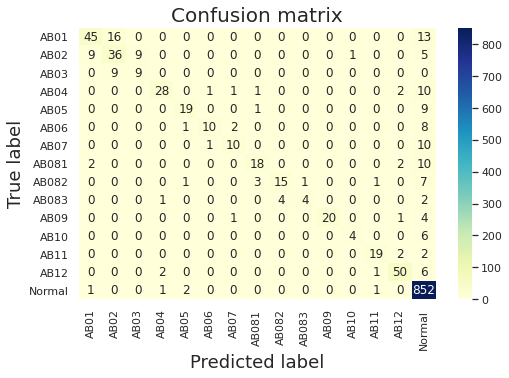

In [14]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)